# Predict Future Sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [2]:
cd "/Users/karthikjami/Downloads/competitive-data-science-predict-future-sales"

/Users/karthikjami/Downloads/competitive-data-science-predict-future-sales


In [3]:
train_dataset = pd.read_csv('sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
test_dataset = pd.read_csv('test.csv')
shops_dataset = pd.read_csv('shops.csv')
items_dataset = pd.read_csv('items.csv')
item_catg = pd.read_csv('item_categories.csv')
sample_sub = pd.read_csv('sample_submission.csv')

# checking the size of these datasets
print("train dataset:", train_dataset.shape)
print("test dataset:", test_dataset.shape)
print("shops dataset:", shops_dataset.shape)
print("items dataset:", items_dataset.shape)
print("item_categories dataset:", item_catg.shape)

train dataset: (2935849, 6)
test dataset: (214200, 3)
shops dataset: (60, 2)
items dataset: (22170, 3)
item_categories dataset: (84, 2)


In [4]:
# head of training dataset

train_dataset.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [5]:
# head of test data set
test_dataset.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
shops_dataset.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
items_dataset.head()
item_catg.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
# describing the training set
train_dataset.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [9]:
# getting the information about the data

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [10]:
# checking if there is any Null data inside the given data

print("No. of Null values in the train set :", train_dataset.isnull().sum().sum())
print("No. of Null values in the test set :", test_dataset.isnull().sum().sum())
print("No. of Null values in the item set :", items_dataset.isnull().sum().sum())
print("No. of Null values in the shops set :", shops_dataset.isnull().sum().sum())
print("No. of Null values in the item_categories set :", item_catg.isnull().sum().sum())

No. of Null values in the train set : 0
No. of Null values in the test set : 0
No. of Null values in the item set : 0
No. of Null values in the shops set : 0
No. of Null values in the item_categories set : 0


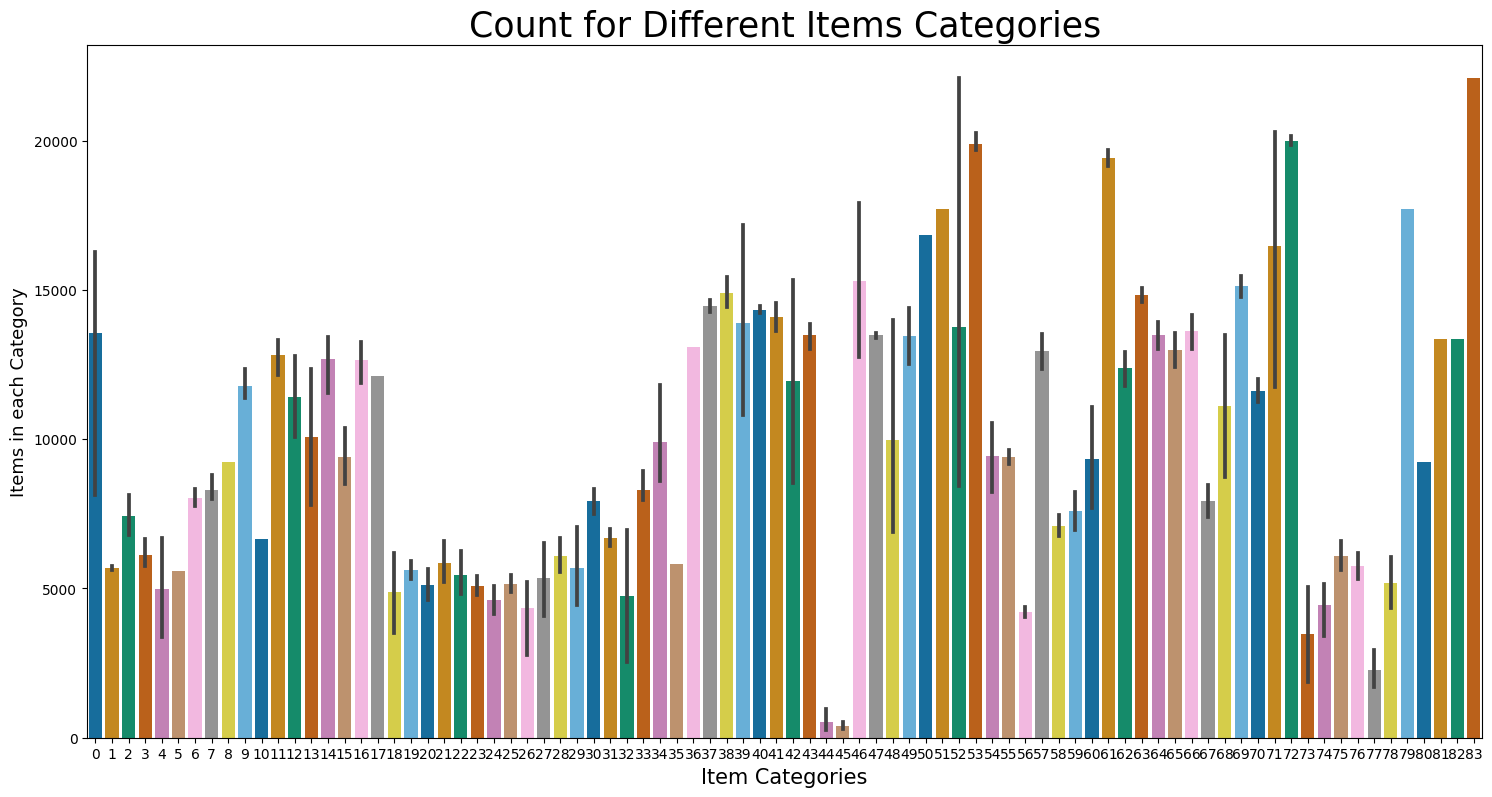

In [11]:
x = items_dataset['item_category_id']
y = items_dataset['item_id']

plt.rcParams['figure.figsize'] = (18, 9)
sns.barplot(x=x, y=y, palette = 'colorblind')
plt.title('Count for Different Items Categories', fontsize = 25)
plt.xlabel('Item Categories', fontsize = 15)
plt.ylabel('Items in each Category', fontsize = 13)
plt.show()

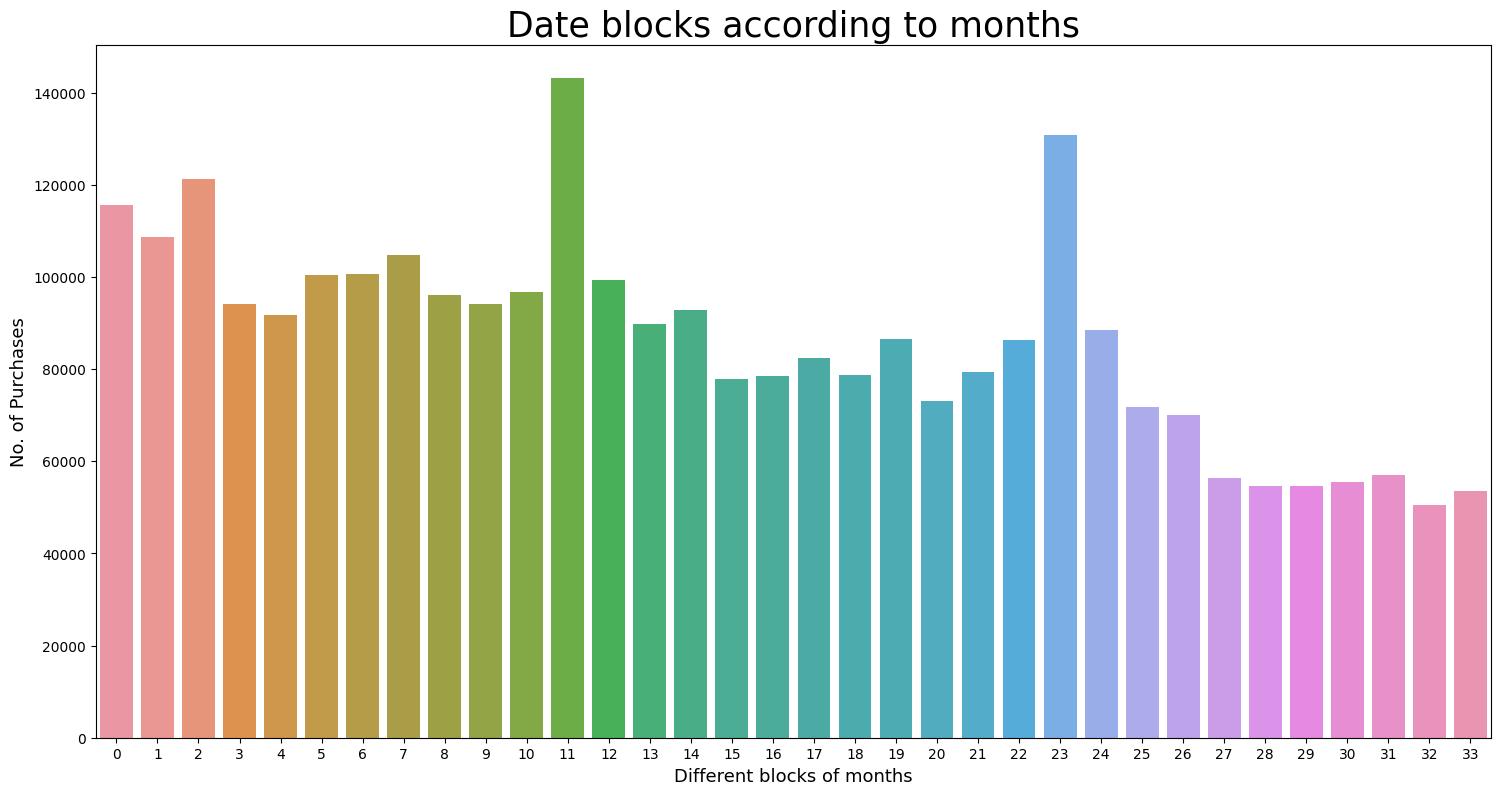

In [12]:
# having a look at the distribution of item sold per day
x = train_dataset['date_block_num']
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(x=x)
plt.title('Date blocks according to months', fontsize = 25)
plt.xlabel('Different blocks of months', fontsize = 13)
plt.ylabel('No. of Purchases', fontsize = 13)
plt.show()

C:\Users\Nani\AppData\Local\Temp\ipykernel_21496\712305344.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_dataset['item_price'], color = 'red')


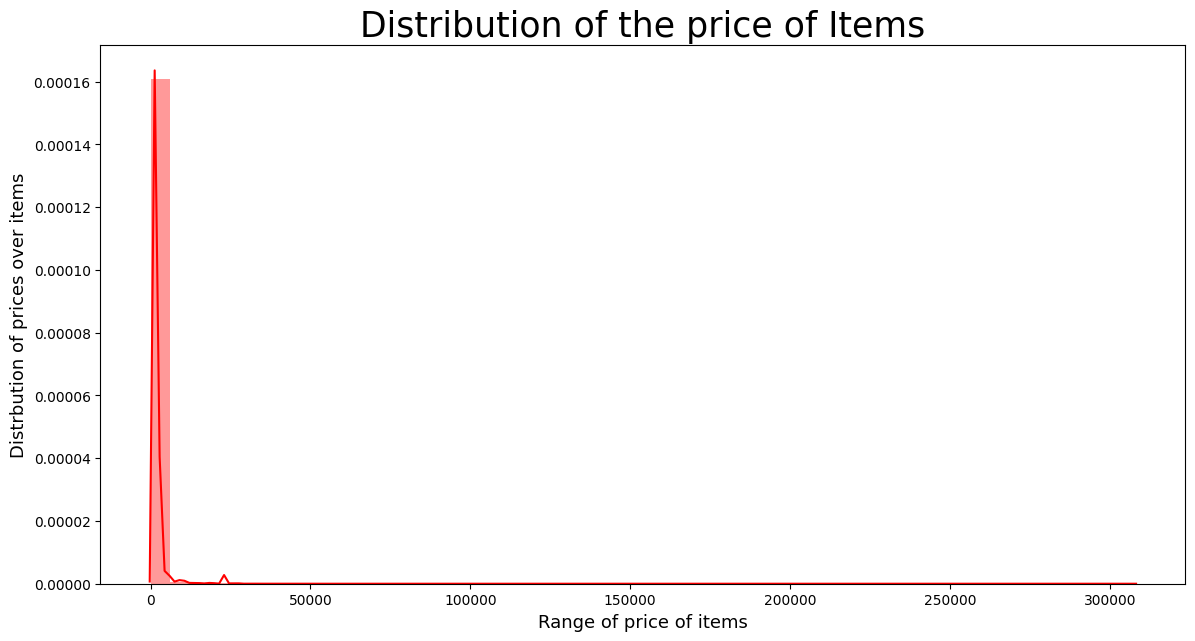

In [13]:
# having a look at the distribution of item price

plt.rcParams['figure.figsize'] = (14, 7)
sns.distplot(train_dataset['item_price'], color = 'red')
plt.title('Distribution of the price of Items', fontsize = 25)
plt.xlabel('Range of price of items', fontsize = 13)
plt.ylabel('Distrbution of prices over items', fontsize = 13)
plt.show()

C:\Users\Nani\AppData\Local\Temp\ipykernel_21496\1782623359.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_dataset['item_cnt_day'], color = 'purple')


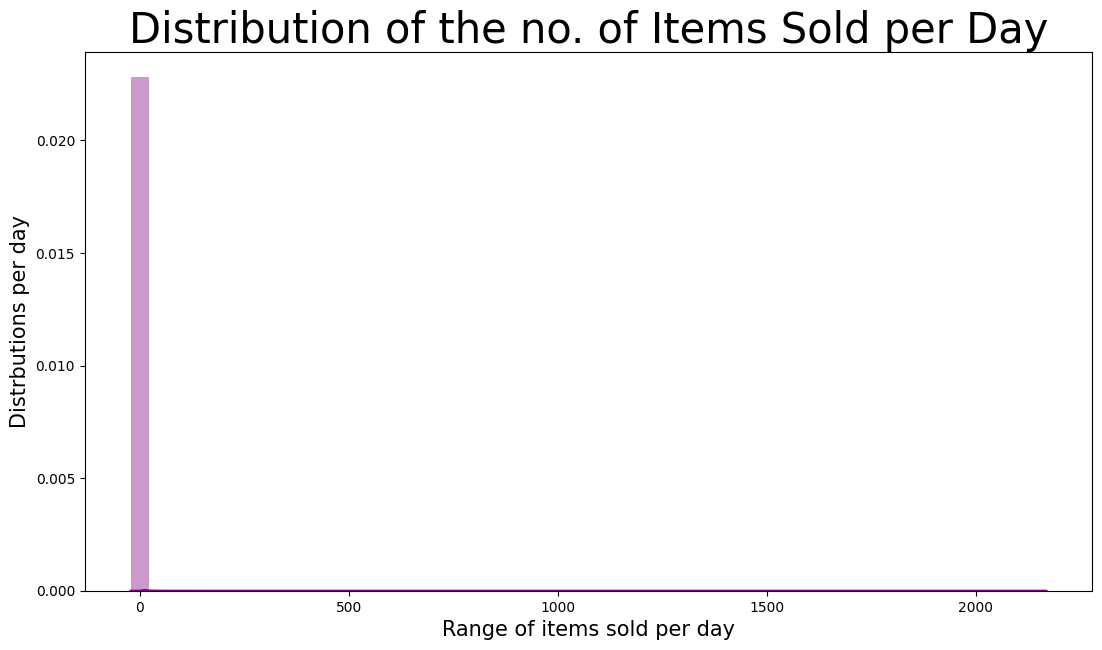

In [14]:
# having a look at the distribution of item sold per day
plt.rcParams['figure.figsize'] = (13, 7)
sns.distplot(train_dataset['item_cnt_day'], color = 'purple')
plt.title('Distribution of the no. of Items Sold per Day', fontsize = 30)
plt.xlabel('Range of items sold per day', fontsize = 15)
plt.ylabel('Distrbutions per day', fontsize = 15)
plt.show()

In [15]:
# checking the no. of unique item present in the stores

x = train_dataset['item_id'].nunique()
print("The No. of Unique Items Present in the stores available: ", x)

The No. of Unique Items Present in the stores available:  21807


In [16]:
# checking the no. of unique item present in the stores

x = item_catg['item_category_id'].nunique()
print("The No. of Unique categories for Items Present in the stores available: ", x)

The No. of Unique categories for Items Present in the stores available:  84


In [17]:
# checking the no. of unique shops given in the dataset

x = train_dataset['shop_id'].nunique()
print("No. of Unique Shops are :", x)

No. of Unique Shops are : 60


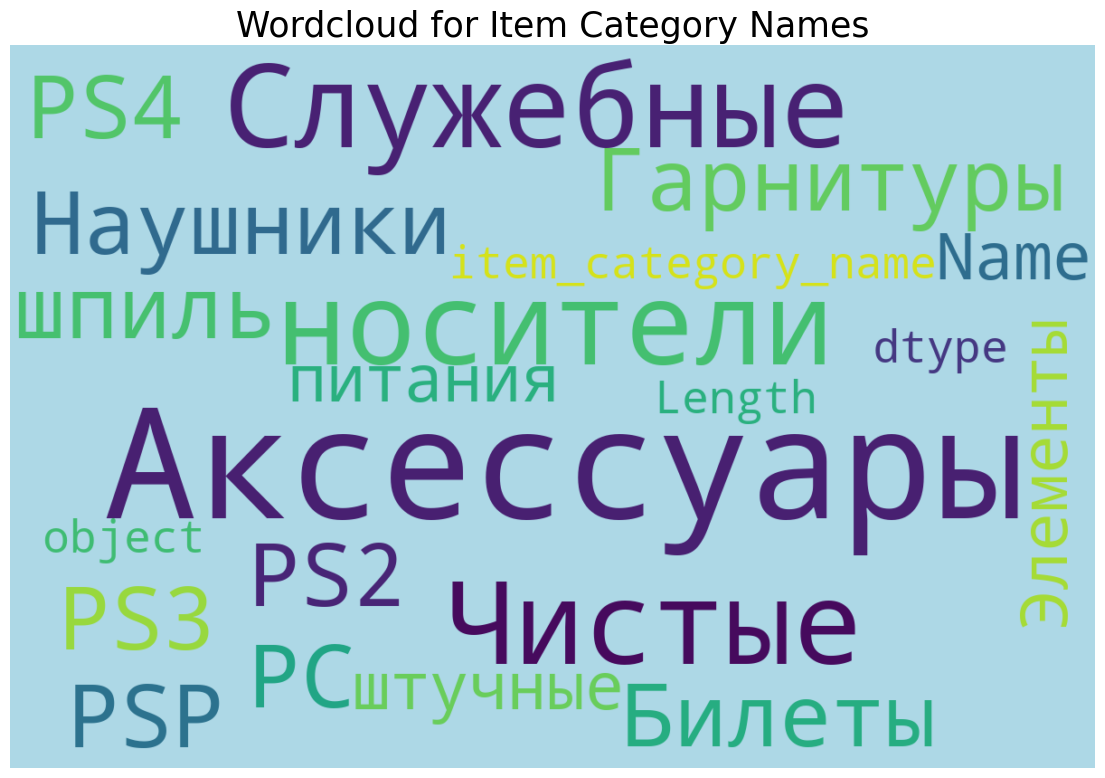

In [18]:
# making a word cloud for item categories name

plt.rcParams['figure.figsize'] = (14, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(item_catg['item_category_name']))


plt.title('Wordcloud for Item Category Names', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

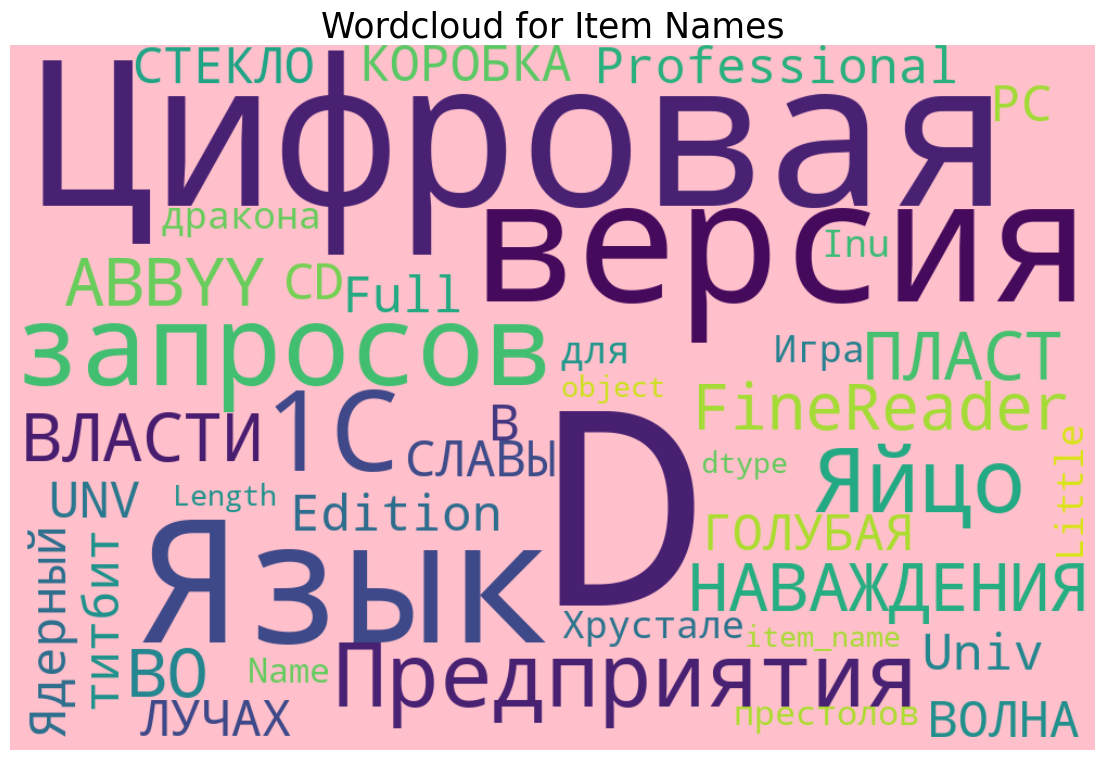

In [19]:
#WordCloud for Item Names

plt.rcParams['figure.figsize'] = (14, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink',
                      max_words = 250, 
                      stopwords = stopwords,
                     width = 1000,
                     height = 650,
                     random_state = 42).generate(str(items_dataset['item_name']))


plt.title('Wordcloud for Item Names', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

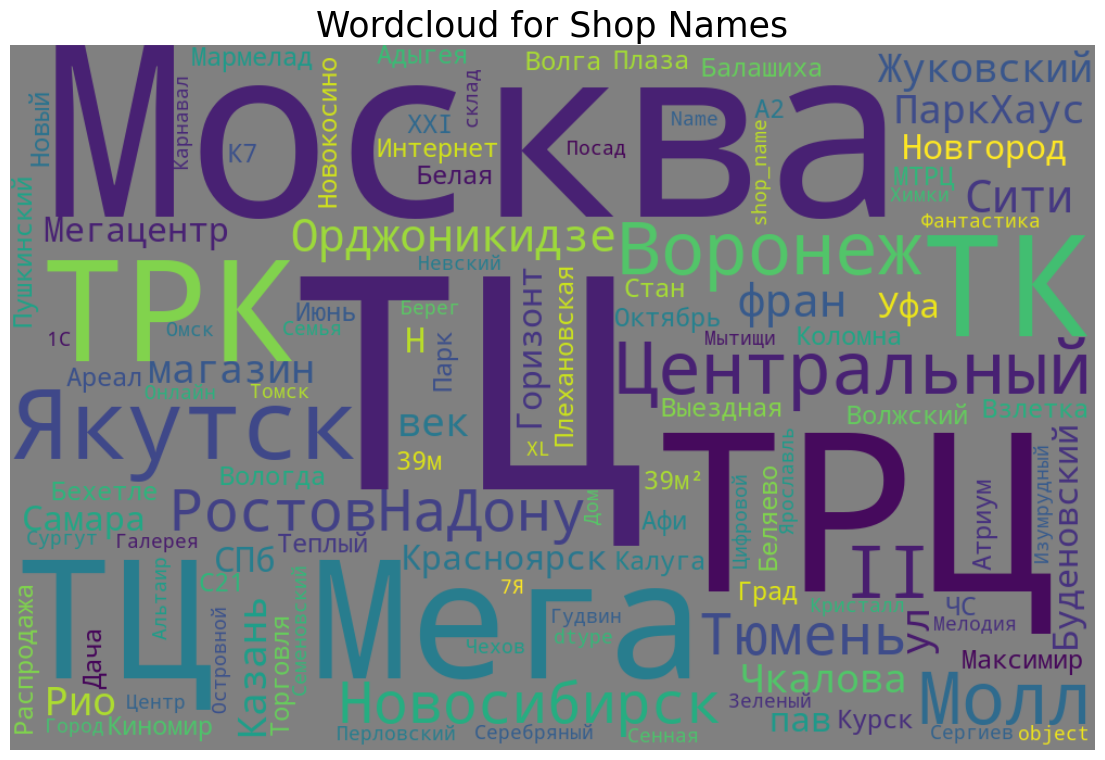

In [20]:
#WordCloud for Shop Names

plt.rcParams['figure.figsize'] = (14, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'gray',
                      max_words = 250, 
                      stopwords = stopwords,
                     width = 1000,
                     height = 650,
                     random_state = 42).generate(str(shops_dataset['shop_name']))


plt.title('Wordcloud for Shop Names', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [21]:
#Create new columns to show the busiest sales on daily/weekly/monthly/yearly basis w.r.t Shops

train_dataset['day'] = train_dataset['date'].dt.day

train_dataset['month'] = train_dataset['date'].dt.month

train_dataset['year'] = train_dataset['date'].dt.year

train_dataset['week'] = train_dataset['date'].dt.week


C:\Users\Nani\AppData\Local\Temp\ipykernel_21496\3369058456.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_dataset['week'] = train_dataset['date'].dt.week


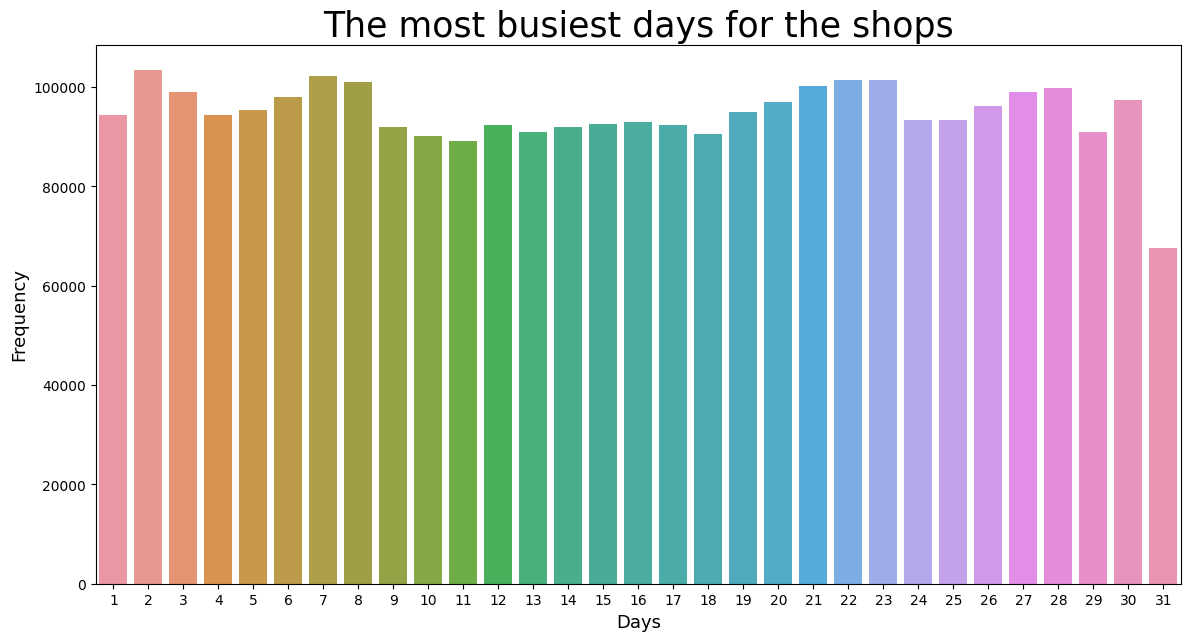

In [22]:
# Busiest days for Shops

x = train_dataset['day']
plt.rcParams['figure.figsize'] = (14, 7)
sns.countplot(x=x)
plt.title('The most busiest days for the shops', fontsize = 25)
plt.xlabel('Days', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)

plt.show()

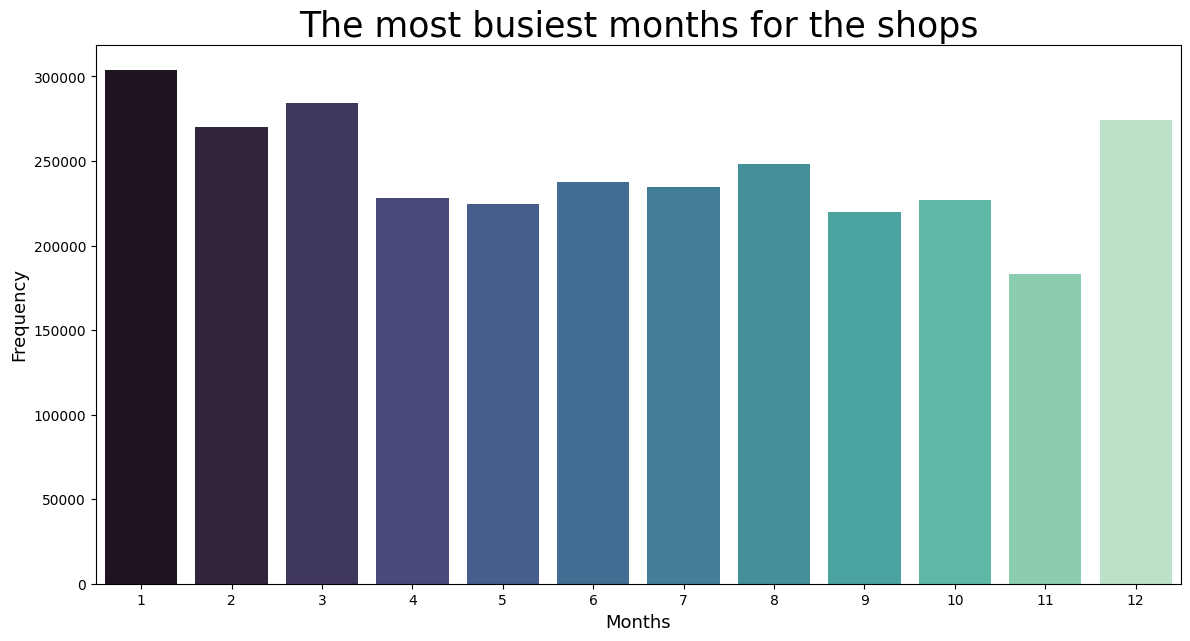

In [23]:
# Busiest Months for Shops

x = train_dataset['month']
plt.rcParams['figure.figsize'] = (14, 7)
sns.countplot(x=x, palette = 'mako')
plt.title('The most busiest months for the shops', fontsize = 25)
plt.xlabel('Months', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
plt.show()

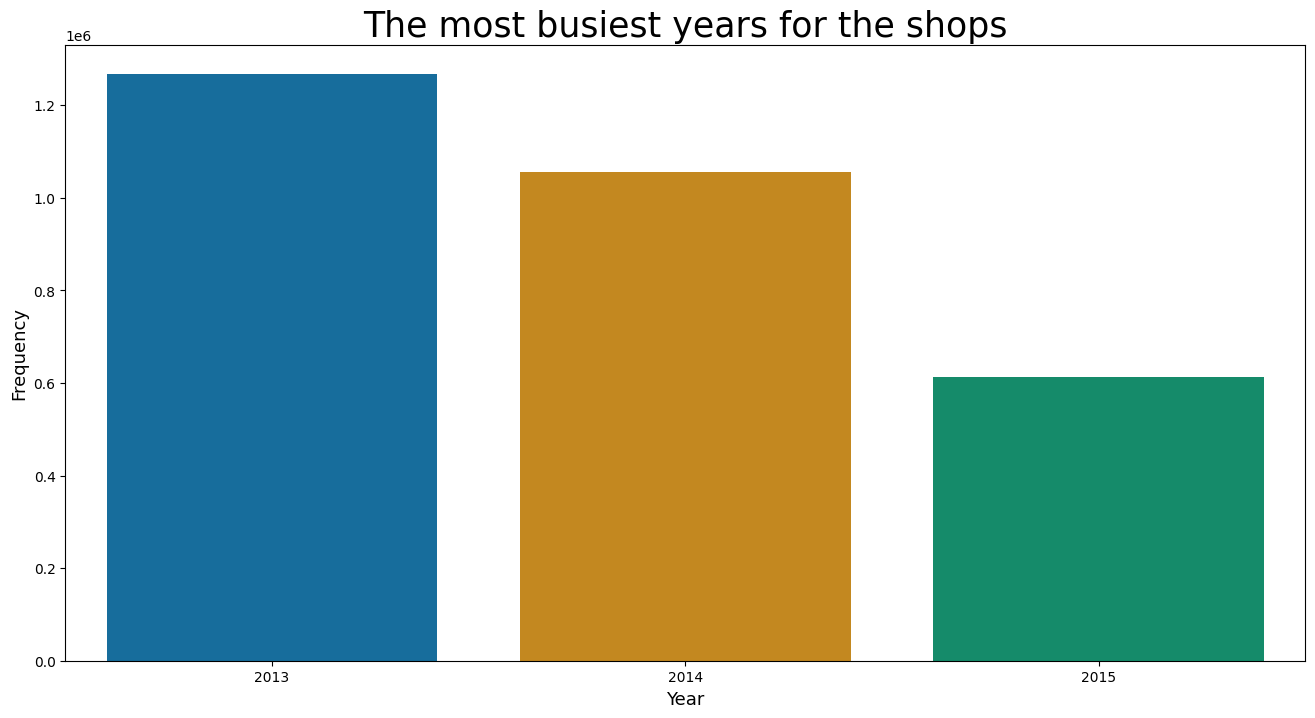

In [24]:
# Busiest Years for Shops

x = train_dataset['year']
plt.rcParams['figure.figsize'] = (16, 8)
sns.countplot(x=x, palette = 'colorblind')
plt.title('The most busiest years for the shops', fontsize = 25)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
plt.show()

In [25]:
# Feature Engineering: We are going to calculate revenue and show their distribution in pictorial form as shown below:

train_dataset['revenue'] = train_dataset['item_price'] * train_dataset['item_cnt_day']


In [26]:
train_dataset.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
day                        int64
month                      int64
year                       int64
week                       int64
revenue                  float64
dtype: object

In [27]:
#Checking the memory usage by these datasets.
train_dataset.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
 6   day             int64         
 7   month           int64         
 8   year            int64         
 9   week            int64         
 10  revenue         float64       
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 246.4 MB


In [28]:
#Lot of these are listed as either int64 or float64, we can reduce them down to a smaller space types like int16 or float8. 
#Downcasting is a way to reduce the datatypes of each feature to its lowest possible type as shown below:

for column in train_dataset:
    if train_dataset[column].dtype == 'float64':
        train_dataset[column]=pd.to_numeric(train_dataset[column], downcast='float')
    if train_dataset[column].dtype == 'int64':
        train_dataset[column]=pd.to_numeric(train_dataset[column], downcast='integer')

train_dataset.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int8          
 2   shop_id         int8          
 3   item_id         int16         
 4   item_price      float64       
 5   item_cnt_day    float32       
 6   day             int8          
 7   month           int8          
 8   year            int16         
 9   week            int8          
 10  revenue         float64       
dtypes: datetime64[ns](1), float32(1), float64(2), int16(2), int8(5)
memory usage: 103.6 MB


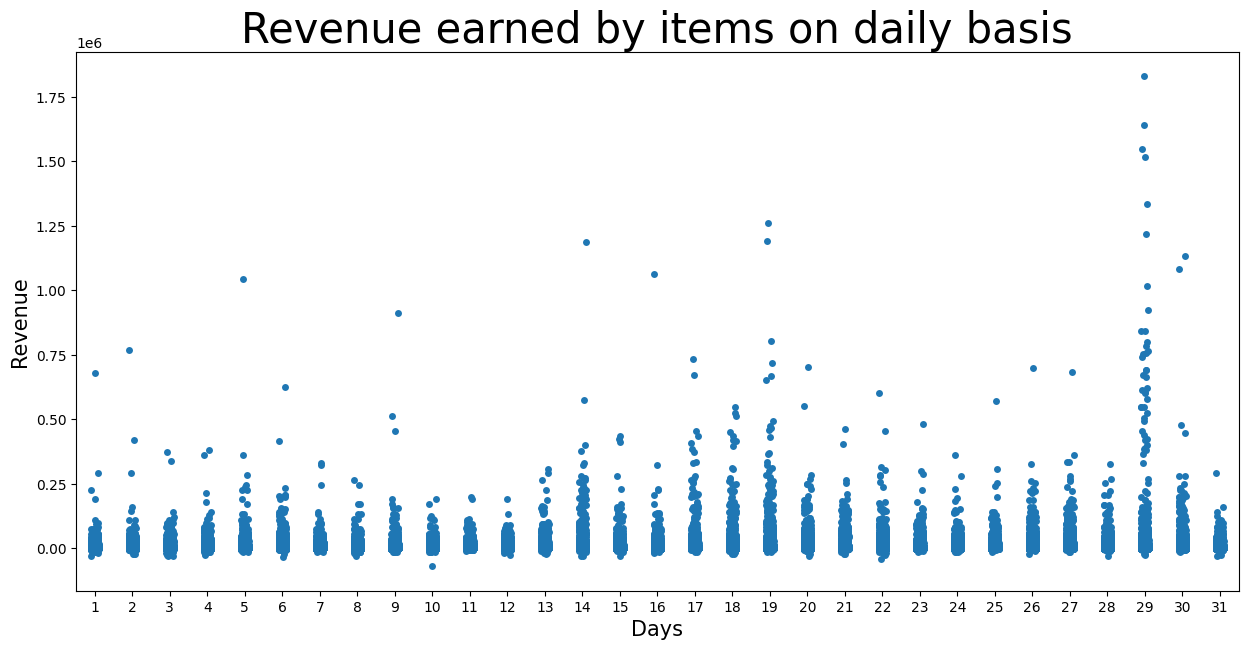

In [29]:
# Plot to show the revenue generated by items on daily basis

plt.rcParams['figure.figsize'] = (15, 7)
sns.stripplot(x = train_dataset['day'], y = train_dataset['revenue'])
plt.title('Revenue earned by items on daily basis', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

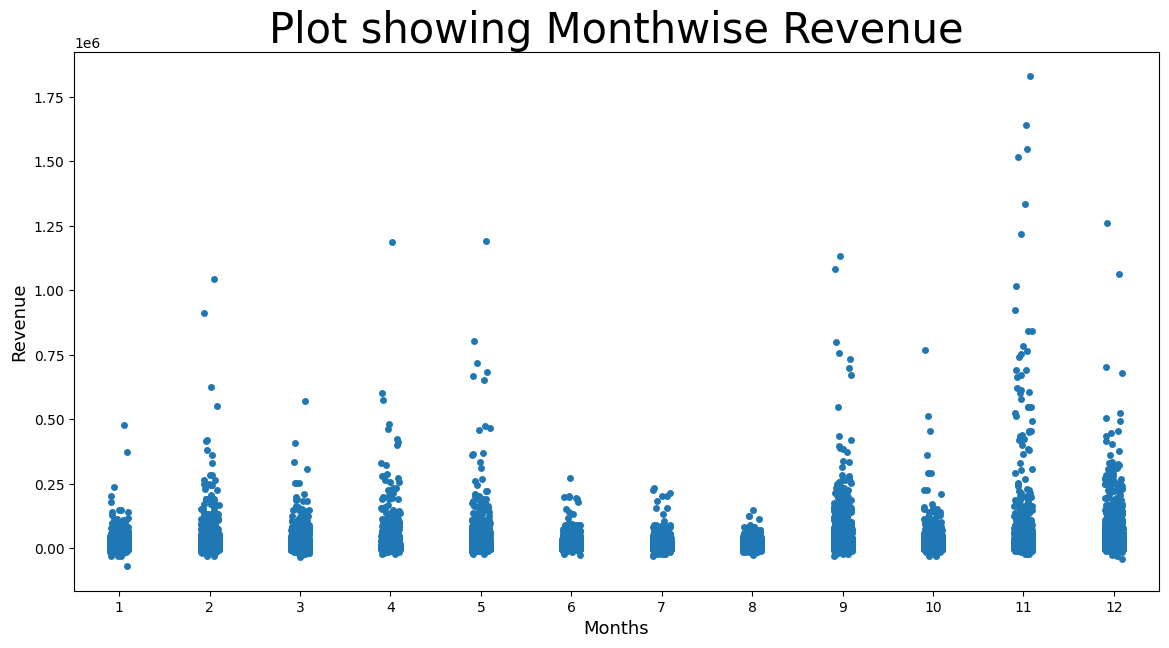

In [30]:
# plotting a box plot for itemprice and item-cnt-day

plt.rcParams['figure.figsize'] = (14, 7)
sns.stripplot(x = train_dataset['month'], y = train_dataset['revenue'])
plt.title('Plot showing Monthwise Revenue', fontsize = 30)
plt.xlabel('Months', fontsize = 13)
plt.ylabel('Revenue', fontsize = 13)
plt.show()

In [31]:
# Converting the data into monthly sales as we need to predict monthly sales.

# Create a dataset containing only monthly sales data
all_data = train_dataset.groupby([train_dataset['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()

# specifying the important attributes which we want to add to the data
all_data = all_data[['date','item_id','shop_id','item_cnt_day']]

# at last we can select the specific attributes from the dataset which are important 
all_data = all_data.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()

# looking at the newly prepared datset
all_data.shape

C:\Users\Nani\AppData\Local\Temp\ipykernel_21496\1699083312.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data = train_dataset.groupby([train_dataset['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()


(424124, 36)

In [32]:
# let us now merge both monthly sales dataset and test data set

test_dataset = pd.merge(test_dataset, all_data, on = ['item_id', 'shop_id'], how = 'left')

#Fill any missing or empty values
test_dataset.fillna(0, inplace = True)

test_dataset.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Creation of actual Training data

x_train = test_dataset.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)
y_train = test_dataset['2015-10']

# Deleting the first column so as to predict the future sales data
x_test = test_dataset.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)

# checking size of above datasets
print("X_train :", x_train.shape)
print("X_test :", x_test.shape)
print("y_test :", y_train.shape)

X_train : (214200, 34)
X_test : (214200, 34)
y_test : (214200,)


In [34]:
# Display x_train dataset

x_train.head()

,ID,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Display x_test dataset

x_test.head()

,ID,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# splitting the data into train and valid dataset

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

# checking the sizes of tain and valid datasets
print("X_train :", x_train.shape)
print("X_valid :", x_valid.shape)
print("y_train :", y_train.shape)
print("y_valid :", y_valid.shape)

X_train : (160650, 34)
X_valid : (53550, 34)
y_train : (160650,)
y_valid : (53550,)


In [37]:
# MODELING

from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor( n_estimators=200,
                           learning_rate=0.03,
                           num_leaves=32,
                           colsample_bytree=0.9497036,
                           subsample=0.8715623,
                           max_depth=8,
                           reg_alpha=0.04,
                           reg_lambda=0.073,
                           min_split_gain=0.0222415,
                           min_child_weight=40)
model_lgb.fit(x_train, y_train)

y_pred_lgb = model_lgb.predict(x_test)


In [38]:
# Get the test set predictions and clip values to the specified range
y_pred_lgb = model_lgb.predict(x_test).clip(0., 20.)
y_pred_lgb

array([0.45553166, 0.14743646, 0.77081947, ..., 0.10307659, 0.10307659,
       0.10307659])

In [39]:
#Display the predictions of items per month
preds = pd.DataFrame(y_pred_lgb, columns=['item_cnt_month'])
preds

,item_cnt_month
0,0.455532
1,0.147436
2,0.770819
3,0.176467
4,0.147436
...,...
214195,0.257853
214196,0.103077
214197,0.103077
214198,0.103077


In [40]:
preds.to_csv('Submission_Final.csv',index_label='ID')


In [41]:
Predictions = pd.read_csv("Submission_Final.csv")
Predictions['item_cnt_month'] = round(Predictions['item_cnt_month'],2)
Predictions.head()

,ID,item_cnt_month
0,0,0.46
1,1,0.15
2,2,0.77
3,3,0.18
4,4,0.15


#Thank You!